# 3.1 Relaxed lateral boundaries and absorbing boundary at the top

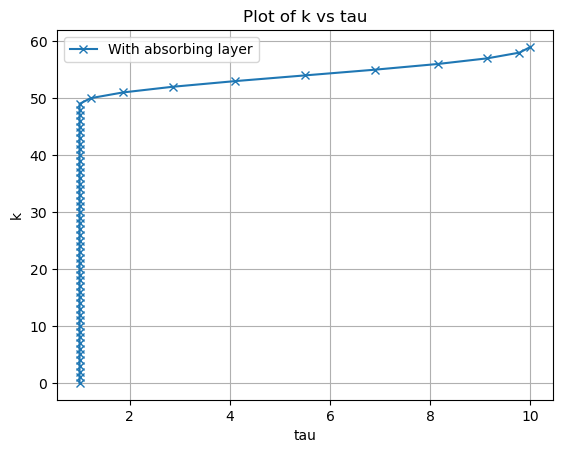

In [7]:
import matplotlib.pyplot as plt



# Calculate the smooth sin^2-type transition for tau in the absorbing region
k_transition = np.arange(nz - nab, nz)
tau_transition = D0 + (Dabs - D0) * np.sin(
    (np.pi / 2) * (k_transition - (nz - nab - 1)) / nab
) ** 2

# Update tau for the absorbing region
tau_new = tau.copy()
tau_new[nz - nab : nz] = tau_transition

# Plot the modified tau profile
plt.plot(tau_new, k, marker='x', label='With absorbing layer')
plt.legend()
plt.xlabel('tau')
plt.ylabel('k')
plt.title('Plot of k vs tau')
plt.grid(True)
plt.show()

In [5]:

import numpy as np
d = np.load("output_ex3.1.2_100h.npz")
print("Number of keys:", len(d.files))
print("Keys:")
for k in d.files:
    a = d[k]
    shape = getattr(a, "shape", None)
    print(f"  {k:20s}  shape={shape}  dtype={a.dtype}")


Number of keys: 14
Keys:
  u00                   shape=()  dtype=float64
  thl                   shape=()  dtype=float64
  th00                  shape=()  dtype=float64
  topomx                shape=()  dtype=int64
  topowd                shape=()  dtype=int64
  nx                    shape=()  dtype=int64
  nz                    shape=()  dtype=int64
  dx                    shape=()  dtype=float64
  time                  shape=(101,)  dtype=int64
  x                     shape=(100,)  dtype=float64
  z                     shape=(60,)  dtype=float64
  height                shape=(101, 60, 100)  dtype=float64
  horizontal_velocity   shape=(101, 60, 100)  dtype=float64
  isentropic_density    shape=(101, 60, 100)  dtype=float64


MovieWriter ffmpeg unavailable; using Pillow instead.


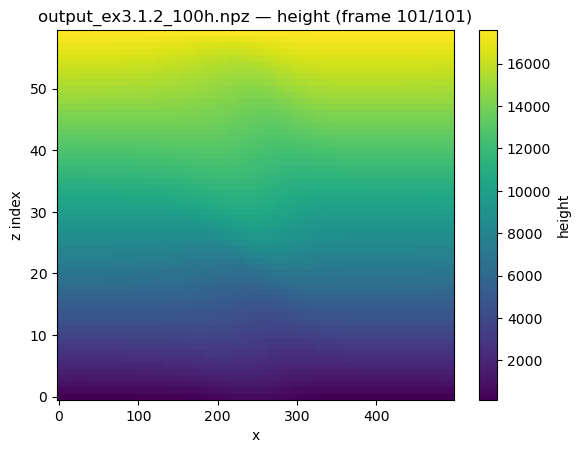

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fn = "output_ex3.1.2_100h.npz"
d = np.load(fn)

# Find a 3D field that looks like (time, z, x)
candidates = []
for k in d.files:
    a = d[k]
    if hasattr(a, "ndim") and a.ndim == 3:
        candidates.append((k, a.shape))

if not candidates:
    raise RuntimeError("No 3D arrays found in the NPZ. Check keys/shapes with the inspection script.")

# Prefer common model outputs if they exist
preferred = ["U", "S", "QV", "QC", "QR", "Z"]
key3d = None
for p in preferred:
    if p in d.files and d[p].ndim == 3:
        key3d = p
        break
if key3d is None:
    key3d = candidates[0][0]  # fallback to first 3D array

A = d[key3d]  # (nt, nz, nx) or (nt, nz1, nx)
nt, nzA, nx = A.shape

# Try to find height field Z for y-axis (optional)
Z = d["Z"] if "Z" in d.files and d["Z"].ndim == 3 else None
if Z is not None:
    # If Z is staggered (nz+1), convert to midlevels when needed
    if Z.shape[1] == nzA + 1:
        Y = 0.5 * (Z[:, :-1, :] + Z[:, 1:, :]) / 1000.0  # km
    else:
        Y = Z / 1000.0  # km (best effort)
else:
    # If no height, use index as y-axis
    Y = np.tile(np.arange(nzA)[None, :, None], (nt, 1, nx))

# x-axis: use physical x if available
if "x" in d.files:
    x = d["x"]
else:
    x = np.arange(nx)

fig, ax = plt.subplots()

# Choose first frame
pcm = ax.pcolormesh(x, Y[0], A[0], shading="auto")
cb = plt.colorbar(pcm, ax=ax)
cb.set_label(f"{key3d}")

ax.set_xlabel("x" if "x" in d.files else "x index")
ax.set_ylabel("z [km]" if Z is not None else "z index")
title = ax.set_title(f"{fn} — {key3d} (frame 1/{nt})")

vmin = np.nanmin(A)
vmax = np.nanmax(A)

def update(i):
    pcm.set_array(A[i].ravel())
    pcm.set_clim(vmin, vmax)
    title.set_text(f"{fn} — {key3d} (frame {i+1}/{nt})")
    return pcm, title

ani = FuncAnimation(fig, update, frames=nt, interval=80, blit=False)
ani.save("output_ex3.1.2_100h_xz_animation.gif", dpi=150)
plt.show()

In [1]:
import numpy as np

output = np.load("output_ex3.1.2_30h_diffabs_0.0.npz")

In [15]:
for k, zkm in enumerate(z_int[:-1]):
    print(f"k={k:2d}  z_lower={zkm:6.2f} km")


k= 0  z_lower=  0.18 km
k= 1  z_lower=  0.54 km
k= 2  z_lower=  0.90 km
k= 3  z_lower=  1.25 km
k= 4  z_lower=  1.60 km
k= 5  z_lower=  1.95 km
k= 6  z_lower=  2.30 km
k= 7  z_lower=  2.64 km
k= 8  z_lower=  2.98 km
k= 9  z_lower=  3.32 km
k=10  z_lower=  3.66 km
k=11  z_lower=  3.99 km
k=12  z_lower=  4.32 km
k=13  z_lower=  4.65 km
k=14  z_lower=  4.97 km
k=15  z_lower=  5.30 km
k=16  z_lower=  5.62 km
k=17  z_lower=  5.93 km
k=18  z_lower=  6.25 km
k=19  z_lower=  6.56 km
k=20  z_lower=  6.88 km
k=21  z_lower=  7.18 km
k=22  z_lower=  7.49 km
k=23  z_lower=  7.80 km
k=24  z_lower=  8.10 km
k=25  z_lower=  8.40 km
k=26  z_lower=  8.70 km
k=27  z_lower=  8.99 km
k=28  z_lower=  9.29 km
k=29  z_lower=  9.58 km
k=30  z_lower=  9.87 km
k=31  z_lower= 10.16 km
k=32  z_lower= 10.45 km
k=33  z_lower= 10.73 km
k=34  z_lower= 11.02 km
k=35  z_lower= 11.30 km
k=36  z_lower= 11.58 km
k=37  z_lower= 11.85 km
k=38  z_lower= 12.13 km
k=39  z_lower= 12.40 km
k=40  z_lower= 12.68 km
k=41  z_lower= 1

In [16]:
z_int

array([ 0.18088483,  0.54116599,  0.89849448,  1.2529183 ,  1.60448427,
        1.95323812,  2.29922447,  2.6424869 ,  2.98306795,  3.3210092 ,
        3.65635124,  3.98913374,  4.31939548,  4.64717436,  4.97250743,
        5.29543092,  5.61598024,  5.93419006,  6.25009427,  6.56372604,
        6.87511783,  7.18430141,  7.49130786,  7.79616764,  8.09891055,
        8.39956578,  8.69816194,  8.99472702,  9.28928847,  9.58187318,
        9.8725075 , 10.16121726, 10.44802777, 10.73296387, 11.01604988,
       11.29730969, 11.57676668, 11.85444384, 12.13036367, 12.4045483 ,
       12.67701939, 12.94779823, 13.21690572, 13.48436235, 13.75018825,
       14.01440319, 14.27702658, 14.53807746, 14.79757456, 15.05553627,
       15.31198064, 15.56692541, 15.82038803, 16.07238561, 16.32293501,
       16.57205277, 16.81975515, 17.06605814, 17.31097747, 17.55452859])

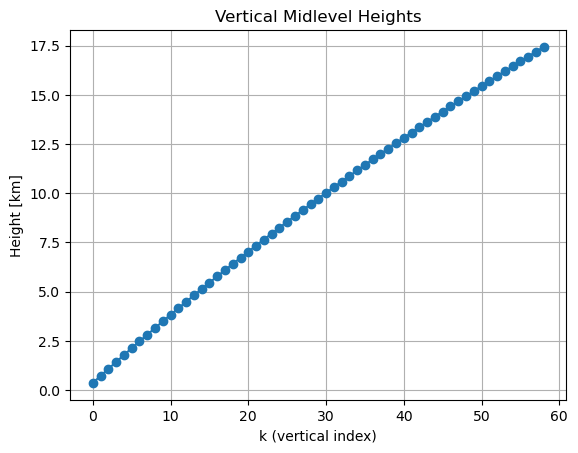

In [13]:
import matplotlib.pyplot as plt

plt.plot(z_mid, marker='o')
plt.xlabel('k (vertical index)')
plt.ylabel('Height [km]')
plt.title('Vertical Midlevel Heights')
plt.grid(True)
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [11]:
import numpy as np
from nmwc_model.readsim import readsim

fn = "output_ex3.1_24h_irelax_0.0.npz"
var = readsim(fn, "horizontal_velocity")

zp = var.zp
xmid = var.nx // 2
z_int = zp[0, :, xmid]
z_mid = 0.5 * (z_int[:-1] + z_int[1:])

def k_for_height(z_target_km):
    return int(np.argmin(np.abs(z_mid - z_target_km)))

print("5 km  -> k_shl =", k_for_height(5))
print("7 km  -> k_sht =", k_for_height(7))
print("9 km  -> k_shl =", k_for_height(9))
print("11 km -> k_sht =", k_for_height(11))

5 km  -> k_shl = 14
7 km  -> k_sht = 20
9 km  -> k_shl = 27
11 km -> k_sht = 33


In [ ]:
(48 * 60 * 60)/

172800